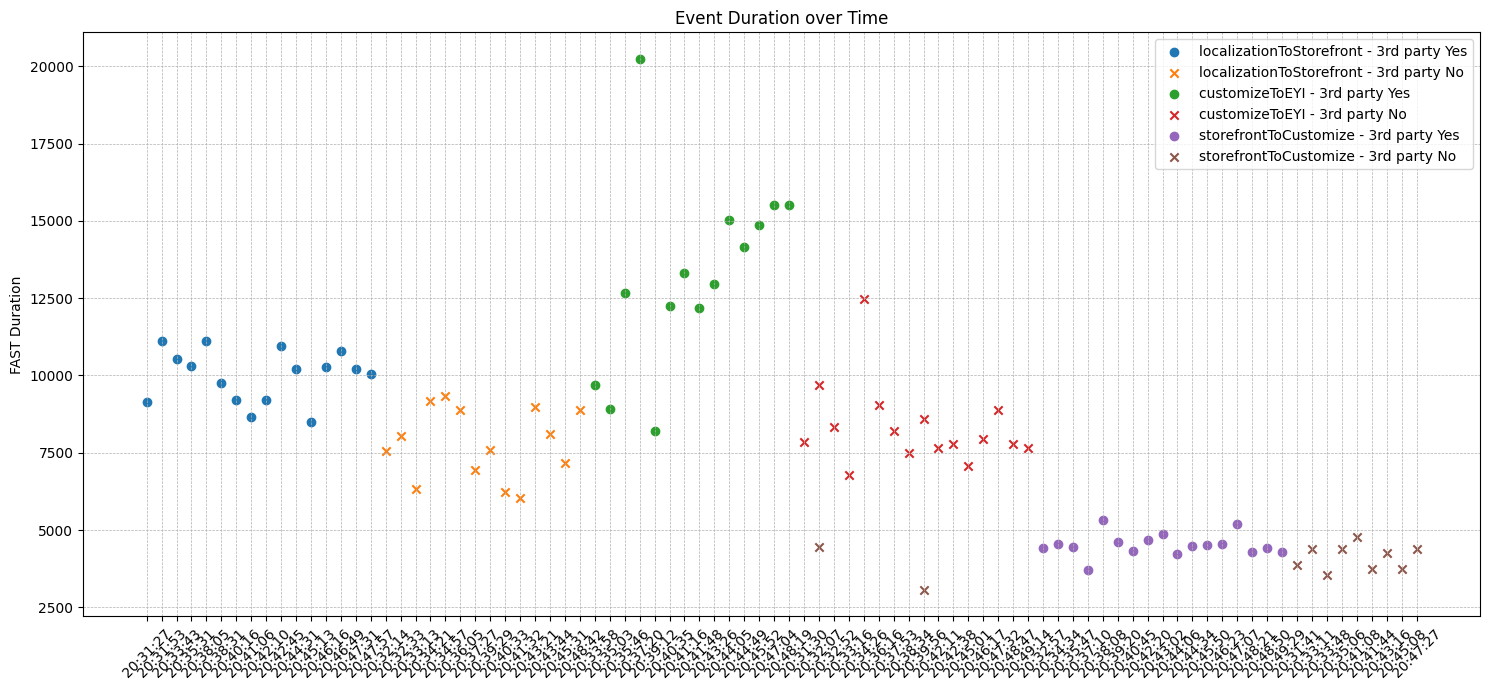

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV
df = pd.read_csv('../results.csv')

# Convert timestamp to a more readable format
df["Timestamp"] = pd.to_datetime(df["Timestamp"]).dt.strftime('%H:%M:%S')

# Define markers for 3rd party scripts
markers = {'Yes': 'o', 'No': 'x'}

# Define colors for each Event Label
colors = {label: color for label, color in zip(df["Event Label"].unique(), ['r', 'g', 'b'])}

# Plotting
plt.figure(figsize=(15, 7))
for label in df["Event Label"].unique():
    for third_party, marker in markers.items():
        subset = df[(df["Event Label"] == label) & (df["3rd party scripts Enabled?"] == third_party)]
        plt.scatter(subset["Timestamp"], subset["FAST Duration"], label=f'{label} - 3rd party {third_party}', marker=marker, color=colors[label])

plt.xticks(rotation=45)
plt.ylabel("FAST Duration")
plt.title("Event Duration over Time")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


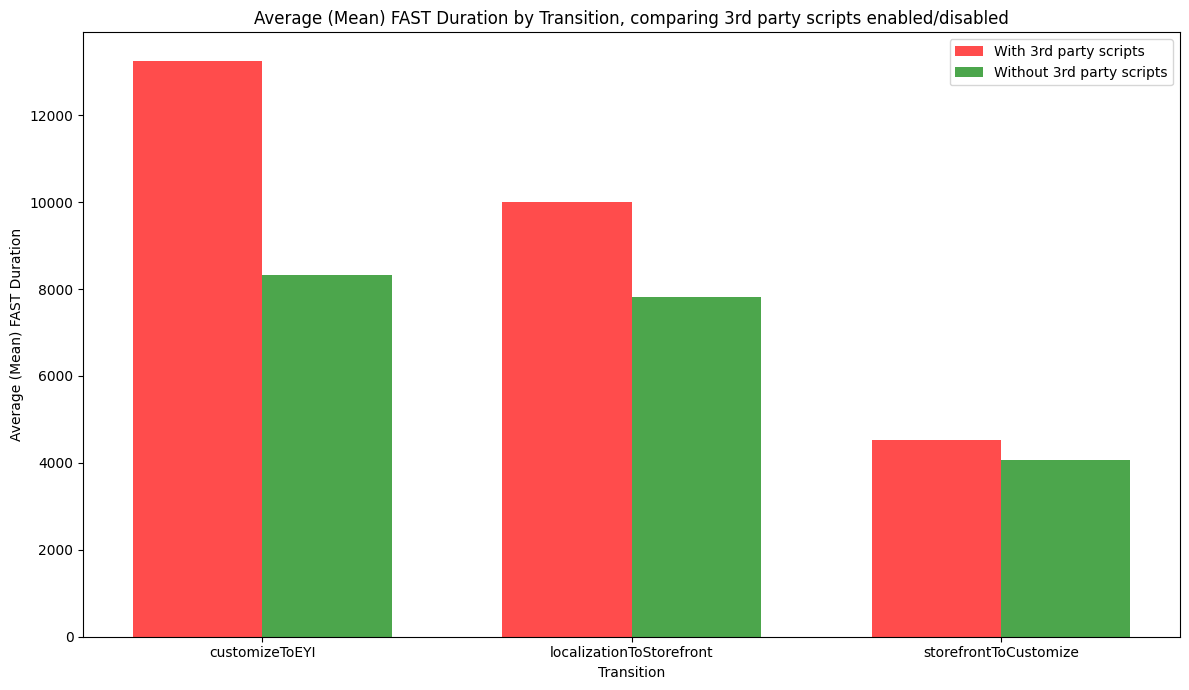

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV
df = pd.read_csv('../results.csv')  # Replace 'path_to_your_file.csv' with the path to your CSV file

# Group by 'Event Label' and '3rd party scripts Enabled?' and sum the 'FAST Duration'
grouped = df.groupby(['Event Label', '3rd party scripts Enabled?'])['FAST Duration'].mean().unstack()

# Plotting
bar_width = 0.35
index = range(len(grouped.index))

fig, ax = plt.subplots(figsize=(12, 7))
bar1 = ax.bar(index, grouped["Yes"], bar_width, label='With 3rd party scripts', color='r', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], grouped["No"], bar_width, label='Without 3rd party scripts', color='g', alpha=0.7)

# Labeling and formatting
ax.set_xlabel('Transition')
ax.set_ylabel('Average (Mean) FAST Duration')
ax.set_title('Average (Mean) FAST Duration by Transition, comparing 3rd party scripts enabled/disabled')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(grouped.index)
ax.legend()
plt.tight_layout()
plt.show()
